In [141]:
# Q2-2 Madaline Network (with MRI algorithm)

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [143]:
###
### PART.B
###

In [144]:
# Read File and store it as dataframe
df = pd.read_csv("MadaLine.csv", header=None)
df[2] = df[2].replace(0, -1)
df

,0,1,2
0,-0.642823,0.720606,-1.0
1,-0.218126,0.677263,-1.0
2,-0.582930,-0.347496,-1.0
3,0.285127,0.091750,-1.0
4,-0.335577,-0.313893,-1.0
...,...,...,...
195,0.744066,-1.206548,1.0
196,-0.457547,1.286227,1.0
197,-1.020000,-0.783926,1.0
198,1.363429,-0.800250,1.0


In [145]:
# Plotting Data 

Text(0.5, 1.0, 'Scatter plot')

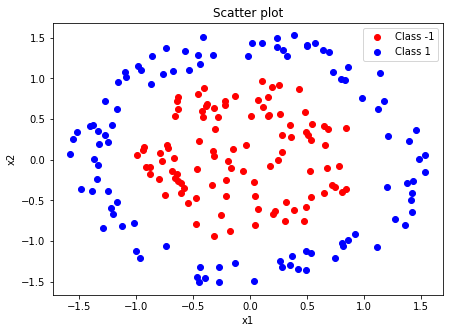

In [146]:
plt.figure(figsize=(7,5))
plt.scatter(x=df.loc[df[2] == -1][0], 
            y=df.loc[df[2] == -1][1], label="Class -1", color="red")
plt.scatter(x=df.loc[df[2] == 1][0], 
            y=df.loc[df[2] == 1][1], label="Class 1", color="blue")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title('Scatter plot')

In [147]:
# Madaline network class 
# has functions to train the model , predict tags , calculate acurracy of predictions, calculate loss,...

In [162]:
class MadalineNetwork:
    def __init__(self, input_features=2, hidden_neurons=3, lr=0.2, stop_threshold=1e-10):
        """
        Set starting weights and biases and other parameters:
        set size of weights and their values; we have [(input_features = 2) * hiddenunits] weights for hiddenlayers 
        small random values are usually used. also output weights and bias are set to construct OR gate.
        """
        self.lr = lr
        self.stop_threshold = stop_threshold
        self.loss_history = []
        self.weights = np.random.random([input_features, hidden_neurons])
        self.output_weights = np.array([1/hidden_neurons] * hidden_neurons)
        self.bias = np.random.random(hidden_neurons)
        self.output_bias = (hidden_neurons - 1)/hidden_neurons
        self.hidden_neurons = hidden_neurons
        self.input_features = input_features

    def calculate_outputs(self, x):
        """Calculate net input to each hidden neuron based on weights and biases
        Calculate output of each hidden neuron with activation func
        Calculate final output of network with output_weights and biases
        """
        x = x.reshape(1, len(x))
        z_in = self.bias + x @ self.weights  
        z = self.activation_function(z_in)
        y_in = self.output_bias + z @ self.output_weights 
        y = self.activation_function(y_in)[0]   
        
        return y, z_in, y_in
    
    def train(self, X, Y, max_epochs=100):
        """Train the madaline network weights and biases with given inputs.
        Stop if loss change is small or reach maximum epochs
        """
        self.loss_history = []
        
        X, Y = shuffle(X, Y, random_state=42)
        for epoch in (range(max_epochs)):
            
            targets, nets, changes = [], [], []
            for x, t in zip(X, Y):
                y, z_in, y_in = self.calculate_outputs(x)
                changes.append(self.update_weights(y, z_in, t, x))
                targets.append(t)
                nets.append(y_in)
            self.loss_history.append(self.calculate_loss(targets, nets))
            if not any(changes):
                print("Weights are not changing terminate training")
                print(epoch ," completed epochs ")
                break
            else:
                if(epoch == max_epochs - 1):
                    print(max_epochs, " completed epochs ")
                
    def activation_function(self, z):
        """will change output values more than 0 to 1 . and less than 0 to -1
        """
        return ((z >= 0) - 0.5) * 2 


    def predict(self, X):
        """Make predictions of all tags based on the trained model
        """
        Y = []
        for x in X:
            y, z_in, y_in = self.calculate_outputs(x)
            Y.append(y)
        return np.array(Y)

    def accuracy(self, X, Y):
        """Calculate accuracy of network 
        """
        preds = []
        for x, t in zip(X, Y):
            y, z_in, y_in = self.calculate_outputs(x)
            preds.append(y)
        
        print(classification_report(Y, preds))
        
        
        print("Accuracy of prediction is:", accuracy_score(Y, preds))
        

    def update_weights(self, y, z_in, t, x):
        """Based on output and learningRate updates weights and biases of hidden layer
        """
        z_in = z_in[0] 
        if t != y:  # If t = y, no weight updates are required
            
            if t == 1:  # if t = 1, update weights on Zj, the unit whose net input is closest to 0
                close_zero_idx = np.argmin(abs(z_in))
                self.weights[:, close_zero_idx] += self.lr * (1 - z_in[close_zero_idx]) * x
                self.bias[close_zero_idx] += self.lr * (1 - z_in[close_zero_idx])
            elif t == -1:  # if t = -1, then update weights on all units Zk that have positive net input
                for h in range(self.hidden_neurons):
                    if z_in[h] > 0:
                        self.weights[:, h] += self.lr * (-1 - z_in[h]) * x
                        self.bias[h] += self.lr * (-1 - z_in[h])
            return True
        return False


            
    def calculate_loss(self, targets, nets):
        """Calcute loss based on given: "1/2 * (target - net)^2")
        """
        return np.mean(1/2 * (np.array(targets) - np.array(nets))**2)

    def plot_loss(self):
        """Draw loss/ epoch 
        """
        plt.plot(self.loss_history, label="1/2 * (target - net)^2")
        plt.legend()
        plt.title("Loss/Epoch")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()

In [163]:
# 3 neurons
# Train Network with 3 hidden neurons then predict and plot loss

3 Hidden neurons
300  completed epochs 
              precision    recall  f1-score   support

        -1.0       0.87      0.89      0.88       100
         1.0       0.89      0.87      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Accuracy of prediction is: 0.88


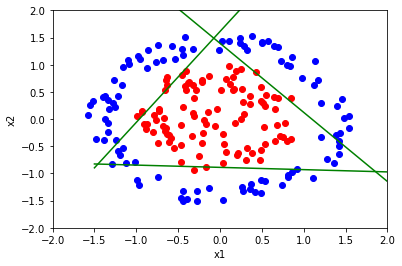

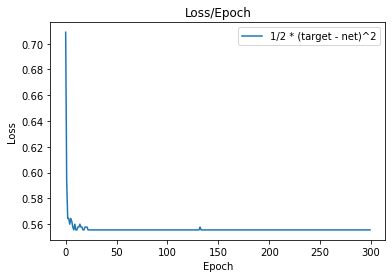

In [164]:
madaline = MadalineNetwork(input_features=2, hidden_neurons=3, lr=0.1)

print("3 Hidden neurons")

madaline.train(X=np.array(df[[0, 1]]), Y=np.array(df[2]), max_epochs=300)#Train network weights and biases 

madaline.accuracy(X=np.array(df[[0, 1]]), Y=np.array(df[2]))#Predicts based on trained model then calculates accuracy  

############################# plot seperator lines
area =[-1.5,-1,0,1,1.5,2]
seperator_line1=[]
seperator_line2=[]
seperator_line3=[]                

for i in range (len(area)):
    seperator_line1.append(-area[i]*(madaline.weights[0][0]/madaline.weights[1][0])-madaline.bias[0]/madaline.weights[1][0])  
    seperator_line2.append(-area[i]*(madaline.weights[0][1]/madaline.weights[1][1])-madaline.bias[1]/madaline.weights[1][1])
    seperator_line3.append(-area[i]*(madaline.weights[0][2]/madaline.weights[1][2])-madaline.bias[2]/madaline.weights[1][2])                                 

plt.scatter(x=df.loc[df[2] == -1][0], 
            y=df.loc[df[2] == -1][1], label="Class -1", color="red")
plt.scatter(x=df.loc[df[2] == 1][0], 
            y=df.loc[df[2] == 1][1], label="Class 1", color="blue")

plt.plot(area,seperator_line1,'g')
plt.plot(area,seperator_line2,'g')
plt.plot(area,seperator_line3,'g')
plt.xlabel("x1")
plt.ylabel("x2")      

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()
#############################

madaline.plot_loss()    

In [165]:
# 4 neurons
# Train Network with 4 hidden neurons then predict and plot loss

4 Hidden neurons
Weights are not changing terminate training
57  completed epochs 
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy of prediction is: 1.0


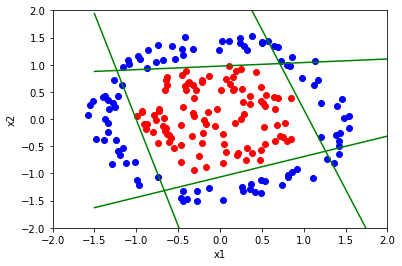

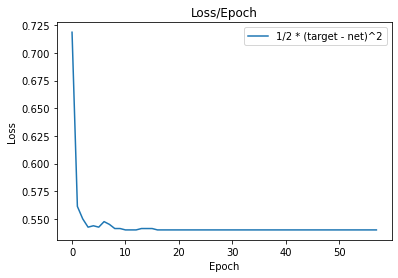

In [166]:
madaline = MadalineNetwork(input_features=2, hidden_neurons=4, lr=0.1)

print("4 Hidden neurons")

madaline.train(X=np.array(df[[0, 1]]), Y=np.array(df[2]), max_epochs=300)#Train network weights and biases 

madaline.accuracy(X=np.array(df[[0, 1]]), Y=np.array(df[2]))#Predicts based on trained model then calculates accuracy  

############################# plot seperator lines
area =[-1.5,-1,0,1,1.5,2]
seperator_line1=[]
seperator_line2=[]
seperator_line3=[]
seperator_line4=[]                


for i in range (len(area)):
    seperator_line1.append(-area[i]*(madaline.weights[0][0]/madaline.weights[1][0])-madaline.bias[0]/madaline.weights[1][0])  
    seperator_line2.append(-area[i]*(madaline.weights[0][1]/madaline.weights[1][1])-madaline.bias[1]/madaline.weights[1][1])
    seperator_line3.append(-area[i]*(madaline.weights[0][2]/madaline.weights[1][2])-madaline.bias[2]/madaline.weights[1][2])
    seperator_line4.append(-area[i]*(madaline.weights[0][3]/madaline.weights[1][3])-madaline.bias[3]/madaline.weights[1][3])                                 
    

plt.scatter(x=df.loc[df[2] == -1][0], 
            y=df.loc[df[2] == -1][1], label="Class -1", color="red")
plt.scatter(x=df.loc[df[2] == 1][0], 
            y=df.loc[df[2] == 1][1], label="Class 1", color="blue")

plt.plot(area,seperator_line1,'g')
plt.plot(area,seperator_line2,'g')
plt.plot(area,seperator_line3,'g')
plt.plot(area,seperator_line4,'g')

plt.xlabel("x1")
plt.ylabel("x2")      

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()
#############################

madaline.plot_loss()    

In [167]:
# 8 neurons
# Train Network with 4 hidden neurons then predict and plot loss

8 Hidden neurons
Weights are not changing terminate training
37  completed epochs 
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy of prediction is: 1.0


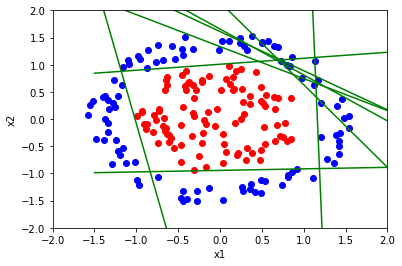

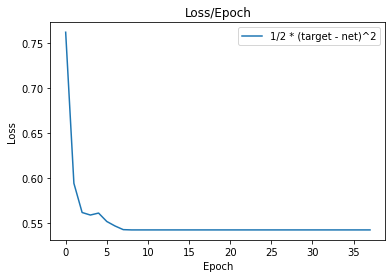

In [168]:
madaline = MadalineNetwork(input_features=2, hidden_neurons=8, lr=0.1)

print("8 Hidden neurons")

madaline.train(X=np.array(df[[0, 1]]), Y=np.array(df[2]), max_epochs=300)#Train network weights and biases 

madaline.accuracy(X=np.array(df[[0, 1]]), Y=np.array(df[2]))#Predicts based on trained model then calculates accuracy  

############################# plot seperator lines
area =[-1.5,-1,0,1,1.5,2]
seperator_line1=[]
seperator_line2=[]
seperator_line3=[]
seperator_line4=[]
seperator_line5=[]                
seperator_line6=[]                
seperator_line7=[]                
seperator_line8=[]                



for i in range (len(area)):
    seperator_line1.append(-area[i]*(madaline.weights[0][0]/madaline.weights[1][0])-madaline.bias[0]/madaline.weights[1][0])  
    seperator_line2.append(-area[i]*(madaline.weights[0][1]/madaline.weights[1][1])-madaline.bias[1]/madaline.weights[1][1])
    seperator_line3.append(-area[i]*(madaline.weights[0][2]/madaline.weights[1][2])-madaline.bias[2]/madaline.weights[1][2])
    seperator_line4.append(-area[i]*(madaline.weights[0][3]/madaline.weights[1][3])-madaline.bias[3]/madaline.weights[1][3])
    seperator_line5.append(-area[i]*(madaline.weights[0][4]/madaline.weights[1][4])-madaline.bias[4]/madaline.weights[1][4])                                 
    seperator_line6.append(-area[i]*(madaline.weights[0][5]/madaline.weights[1][5])-madaline.bias[5]/madaline.weights[1][5])                                 
    seperator_line7.append(-area[i]*(madaline.weights[0][6]/madaline.weights[1][6])-madaline.bias[6]/madaline.weights[1][6])                                 
    seperator_line8.append(-area[i]*(madaline.weights[0][7]/madaline.weights[1][7])-madaline.bias[7]/madaline.weights[1][7])                                 
    
    

plt.scatter(x=df.loc[df[2] == -1][0], 
            y=df.loc[df[2] == -1][1], label="Class -1", color="red")
plt.scatter(x=df.loc[df[2] == 1][0], 
            y=df.loc[df[2] == 1][1], label="Class 1", color="blue")

plt.plot(area,seperator_line1,'g')
plt.plot(area,seperator_line2,'g')
plt.plot(area,seperator_line3,'g')
plt.plot(area,seperator_line4,'g')
plt.plot(area,seperator_line5,'g')
plt.plot(area,seperator_line6,'g')
plt.plot(area,seperator_line7,'g')
plt.plot(area,seperator_line8,'g')


plt.xlabel("x1")
plt.ylabel("x2")      

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()
#############################

madaline.plot_loss()    